In [339]:
# Rohan Subramani, rs4126

In [365]:
# Import packages
import scipy
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy import stats as s

In [381]:
def fxn1(x):
    y = (x-4)**2+2*np.exp(x)
    return y

In [382]:
def findMin(x0,fxn,eta):
    old = x0
    deriv = 2*old - 8 +2 *np.exp(old)
    while abs(deriv) > 0.00001:
        new = old - eta * deriv
        old = new
        deriv = 2*new - 8 +2 *np.exp(new)
    xmin = new
    ymin = fxn(xmin)
    print("xmin,ymin=",xmin,ymin)

In [383]:
findMin(1,fxn1,1/90)

xmin,ymin= 1.0737277262140508 14.41560445578698


In [341]:
# Load file
digits = loadmat("Downloads\digits.mat")

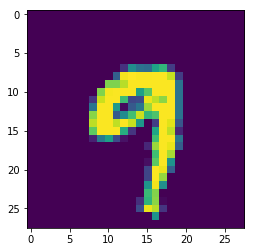

[9]


In [342]:
# See example image and corresponding classification
img = digits['X'][0].reshape(28,28)
plt.imshow(img)
plt.show()
print(digits['Y'][0])

In [ ]:
# (i) Probabilistic MLE classifier

In [358]:
def trainMLEClassifier(trainSize):
    means = []
    covs = []
    for y in range(10):  # for each possible classification y:
        data = getData(digits,trainSize,y) # Subset of images which have the given classification
        mean = getMean(data) # Mean vector
        cov = getCov(data) # Covariance matrix
        means.append(mean)
        covs.append(cov)

    mvGaussians = []    
    for i in range(len(means)):
        mvGaussian = multivariate_normal(means[i],covs[i])
        mvGaussians.append(mvGaussian)
#     print("Training complete.")
    return mvGaussians

In [344]:
def getData(digits,trainSize,y):
    data = []
    for i in range(trainSize): # Look only at training data
        if digits['Y'][i] == [y]:
            data.append(digits['X'][i]) # Save images with the current focus classification
    return data

In [345]:
def getMean(data):
    mean = []
    for pixelNumber in range(784):
        pixelSum = 0
        for image in data:
            pixelSum += image[pixelNumber]
        pixelAvg = pixelSum/len(data)
        mean.append(pixelAvg)
    return mean

In [346]:
def getCov(data):
    
    pixelLists = []
    for i in range(784):
        pixelLists.append([])
    for i in range(784):
        for image in data:
            pixelLists[i].append(image[i]) 
            # For each pixel, make a list of pixel values for all training images with this classification
    pixelLists = np.array(pixelLists)
    cov = np.cov(pixelLists) # How do pixel values covary across images with the same classification?
    
    smallDiag = np.diag([0.001]*784) # Avoid singular cov matrix
    
    cov += smallDiag
    
    return cov

In [347]:
def testMLEClassifier(x): # x in R^784
    highestProb = -5*10**50
    classification = -1
    for i in range(10):
        prob = mvGaussians[i].logpdf(x) # regular pdf is too close to 0 to work
        if prob > highestProb:
            highestProb = prob
            classification = i
    return classification

In [348]:
def trainTestEvalMLE(trainSize):
    mvGaussians = trainMLEClassifier(trainSize) # Get a pdf for each classification
    testSize = 10000 - trainSize  # Test on all data that wasn't in training data
    correct = 0
    for i in range(trainSize+1,trainSize+testSize):
        x = digits['X'][i]
        if digits['Y'][i][0] == testMLEClassifier(x): # If correct classification:
            correct += 1   # Keep track of how many correct
    accuracy = correct/testSize
    return accuracy

In [350]:
# (ii) k-NN

In [389]:
def kNN(x,k,trainSize,getDist):
    kNearest = []
    for i in range(k):
        kNearest.append([10**30,10])
    
    for i in range(trainSize):
        dist = getDist(x,digits['X'][i])
        if dist < kNearest[-1][0]:
            kNearest[-1] = [dist,digits['Y'][i]]
            kNearest.sort() # Places largest distance at the end
    
    nearClasses = [] # Classifications of nearest neighbors
    for neighbor in kNearest:
        nearClasses.append(neighbor[1])
#     print(nearClasses)
    classification = s.mode(nearClasses)[0] # Most common nearby classification, first one if multiple
    return classification[0]

In [390]:
def getL2Dist(x1,x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    dist = np.linalg.norm(x1-x2)
    return dist

In [392]:
def getL1Dist(x1,x2):
    dist = 0
    for i in range(len(x1)):
        diff = abs(x1[i]-x2[i])
        dist += diff
    return dist

In [393]:
def getLInfDist(x1,x2):
    dist = 0
    for i in range(len(x1)):
        diff = abs(x1[i]-x2[i])
        if diff > dist:
            dist = diff
    return dist

In [394]:
def kNNTest(trainSize,testSize,k,getDist):
    
    correct = 0
    for i in range(trainSize+1,trainSize+testSize):
        x = digits['X'][i]
        if (digits['Y'][i] == kNN(x,k,trainSize,getDist)):
            correct += 1

    accuracy = correct/testSize
#     print("Accuracy = ", accuracy)
    return accuracy

trainSize = 40 complete.
trainSize = 100 complete.
trainSize = 200 complete.
trainSize = 400 complete.
trainSize = 600 complete.
trainSize = 800 complete.
trainSize = 1000 complete.
trainSize = 2000 complete.
trainSize = 3000 complete.
trainSize = 4000 complete.
trainSize = 5000 complete.
trainSize = 6000 complete.
trainSize = 7000 complete.
trainSize = 8000 complete.
trainSize = 9000 complete.


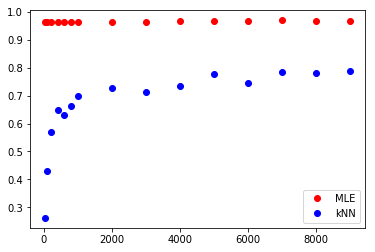

In [387]:
trainSizes = []
MLEaccuracies = []
kNNaccuracies = []
for trainSize in [40,100,200,400,600,800,1000,2000,3000,4000,5000,6000,7000,8000,9000]:
    trainSizes.append(trainSize)
    MLEaccuracy = trainTestEvalMLE(trainSize)
    MLEaccuracies.append(MLEaccuracy)
    kNNaccuracy = kNNTest(trainSize,500,10,getL2Dist) # Only test on 500 because it is pretty slow. Using k = 10.
    kNNaccuracies.append(kNNaccuracy)
    print("trainSize =",trainSize,"complete.")
plt.plot(trainSizes,MLEaccuracies,'ro',label='MLE')
plt.plot(trainSizes,kNNaccuracies,'bo',label='kNN')
plt.legend()
plt.show()

In [399]:
trainSizes = []
L1accuracies = []
L2accuracies = []
LInfaccuracies = []
for trainSize in [40,400,800,1000,5000,8000]:
    trainSizes.append(trainSize)
    L1accuracy = kNNTest(trainSize,500,10,getL1Dist) # Only test on 500 because it is pretty slow. Using k = 10.
    L1accuracies.append(L1accuracy)
    L2accuracy = kNNTest(trainSize,500,10,getL2Dist) # Only test on 500 because it is pretty slow. Using k = 10.
    L2accuracies.append(L2accuracy)
    LInfaccuracy = kNNTest(trainSize,500,10,getLInfDist)
    LInfaccuracies.append(LInfaccuracy)
    print("trainSize =",trainSize,"complete.")
plt.plot(trainSizes,L1accuracies,'ro',label='L1')
plt.plot(trainSizes,L2accuracies,'bo',label='L2')
plt.plot(trainSizes,LInfaccuracies,'go',label='LInf')
plt.legend()
plt.show()

C:\Users\rohns\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
  after removing the cwd from sys.path.


trainSize = 40 complete.
trainSize = 400 complete.


KeyboardInterrupt: 